In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy
import iris
import iris.plot as iplt
from iris.experimental.regrid import regrid_weighted_curvilinear_to_rectilinear

import matplotlib.pyplot as plt

In [1]:
import sys, os

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)

import grids

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [14]:
%matplotlib inline

In [23]:
orig_ipsl_file = '/g/data/ua6/DRSv3/CMIP5/IPSL-CM5A-LR/historicalGHG/mon/ocean/r1i1p1/thetao/latest/thetao_Omon_IPSL-CM5A-LR_historicalGHG_r1i1p1_195001-199912.nc'
orig_noresm_file = '/g/data/ua6/DRSv3/CMIP5/NorESM1-M/historicalGHG/mon/ocean/r1i1p1/thetao/latest/thetao_Omon_NorESM1-M_historicalGHG_r1i1p1_185001-185312.nc'

In [25]:
orig_ipsl_cube = iris.load_cube(orig_ipsl_file)[0, 0 , ::]
print(orig_ipsl_cube)

sea_water_potential_temperature / (K) (cell index along second dimension: 149; cell index along first dimension: 182)
     Dimension coordinates:
          cell index along second dimension                             x                                      -
          cell index along first dimension                              -                                      x
     Auxiliary coordinates:
          latitude                                                      x                                      x
          longitude                                                     x                                      x
     Scalar coordinates:
          depth: 4.999938011169434 m, bound=(0.0, 10.000015258789062) m
          time: 1950-01-16 12:00:00, bound=(1950-01-01 00:00:00, 1950-02-01 00:00:00)
     Attributes:
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_IPSL-CM5A-LR_historicalGHG_r0

In [26]:
orig_noresm_cube = iris.load_cube(orig_noresm_file)[0, 0 , ::]
print(orig_noresm_cube)

sea_water_potential_temperature / (K) (cell index along second dimension: 384; cell index along first dimension: 320)
     Dimension coordinates:
          cell index along second dimension                             x                                      -
          cell index along first dimension                              -                                      x
     Auxiliary coordinates:
          latitude                                                      x                                      x
          longitude                                                     x                                      x
     Scalar coordinates:
          depth: 0.0 m, bound=(0.0, 2.5) m
          time: 1850-01-16 12:00:00, bound=(1850-01-01 00:00:00, 1850-02-01 00:00:00)
     Attributes:
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_NorESM1-M_historicalGHG_r0i0p0.nc...
          branch_time

In [27]:
def get_dim_vals(user_input, bounds=False):
    """Get the list of values for a data dimension/axis.
    Args:
      bounds (bool): input represents the bounds, not centre points
    """

    vals = user_input
    if user_input:
        if len(user_input) == 3:
            start, stop, step = user_input
            vals = list(numpy.arange(start, stop + step, step))
        if bounds:
            vals = numpy.array(vals)
            vals = (vals[1:] + vals[:-1]) / 2
    
    return list(vals)

In [28]:
lats = get_dim_vals([-80, 80, 1.0]) 
lons = get_dim_vals([2, 360, 2])
horizontal_grid = grids.make_grid(lats, lons)

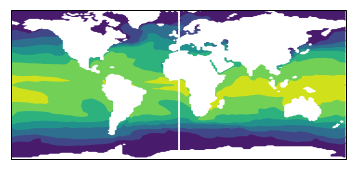

In [29]:
new_noresm_cube, coord_names, regrid_status = grids.curvilinear_to_rectilinear(orig_noresm_cube, target_grid_cube=horizontal_grid)
iplt.contourf(new_noresm_cube)

In [32]:
ipsl_area_cube = iris.load_cube('/g/data/ua6/DRSv3/CMIP5/IPSL-CM5A-LR/historical/fx/ocean/r0i0p0/areacello/latest/areacello_fx_IPSL-CM5A-LR_historical_r0i0p0.nc')
ipsl_area_cube

<iris 'Cube' of cell_area / (m2) (cell index along second dimension: 149; cell index along first dimension: 182)>

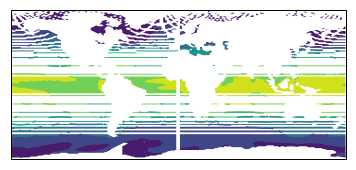

In [33]:
new_ipsl_cube, coord_names, regrid_status = grids.curvilinear_to_rectilinear(orig_ipsl_cube, 
                                                                             weights=ipsl_area_cube.data,
                                                                             target_grid_cube=horizontal_grid)
iplt.contourf(new_ipsl_cube)

# Using cdo...

In [2]:
cdo_file = '/g/data/r87/dbi599/DRSv2/CMIP5/IPSL-CM5A-LR/historical/yr/ocean/r1i1p1/thetao/latest/thetao_Oyr_IPSL-CM5A-LR_historical_r1i1p1_185001-189912_susan-grid.nc'

In [3]:
cdo_cube = iris.load_cube(cdo_file, 'sea_water_potential_temperature')

In [4]:
cdo_cube

<iris 'Cube' of sea_water_potential_temperature / (K) (time: 50; depth: 66; latitude: 161; longitude: 180)>

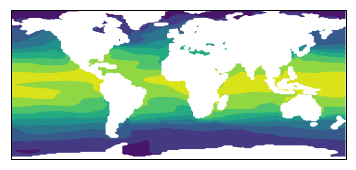

In [6]:
iplt.contourf(cdo_cube[0, 0, ::])